In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faithsobecyril/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/faithsobecyril/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faithsobecyril/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


category                                              title  \
0  ARTS & CULTURE  Modeling Agencies Enabled Sexual Predators For...   
1  ARTS & CULTURE  Actor Jeff Hiller Talks “Bright Colors And Bol...   
2  ARTS & CULTURE  New Yorker Cover Puts Trump 'In The Hole' Afte...   
3  ARTS & CULTURE  Man Surprises Girlfriend By Drawing Them In Di...   
4  ARTS & CULTURE  This Artist Gives Renaissance-Style Sculptures...   

                                                body  
0  In October 2017, Carolyn Kramer received a dis...  
1  This week I talked with actor Jeff Hiller abou...  
2  The New Yorker is taking on President Donald T...  
3  Kellen Hickey, a 26-year-old who lives in Huds...  
4  There’s something about combining the traditio...

In [139]:
data =  pd.read_csv("Dataset/news-article-categories.csv")
data.head()

category                                              title  \
0  ARTS & CULTURE  Modeling Agencies Enabled Sexual Predators For...   
1  ARTS & CULTURE  Actor Jeff Hiller Talks “Bright Colors And Bol...   
2  ARTS & CULTURE  New Yorker Cover Puts Trump 'In The Hole' Afte...   
3  ARTS & CULTURE  Man Surprises Girlfriend By Drawing Them In Di...   
4  ARTS & CULTURE  This Artist Gives Renaissance-Style Sculptures...   

                                                body  
0  In October 2017, Carolyn Kramer received a dis...  
1  This week I talked with actor Jeff Hiller abou...  
2  The New Yorker is taking on President Donald T...  
3  Kellen Hickey, a 26-year-old who lives in Huds...  
4  There’s something about combining the traditio...

In [24]:
##get information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  6877 non-null   object
 1   title     6877 non-null   object
 2   body      6872 non-null   object
dtypes: object(3)
memory usage: 161.3+ KB


In [25]:
data.describe()

category                               title  \
count             6877                                6877   
unique              14                                6836   
top     ARTS & CULTURE  Extreme Weather Photos Of The Week   
freq              1002                                  24   

                                                     body  
count                                                6872  
unique                                               6815  
top     This week brought several big headlines in ext...  
freq                                                   21

In [26]:
data.shape

(6877, 3)

In [27]:
data['category'].value_counts()

category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64

In [120]:
##check for rows in missing values and drop rows with them
count_of_rows_with_any_missing_value = len(data[data.isnull().any(axis=1)])
total_row_count = data.shape[0]
print(f"Percentage of rows with missing values: {(count_of_rows_with_any_missing_value/total_row_count)*100}%")

Percentage of rows with missing values: 0.07270612185546023%


In [140]:
##drop rows with any missing values
data.drop(data[data.isnull().any(axis=1)].index,inplace=True)

In [122]:
##check again for rows in missing values and drop rows with them
count_of_rows_with_any_missing_value = len(data[data.isnull().any(axis=1)])
total_row_count = data.shape[0]
print(f"Percentage of rows with missing values: {(count_of_rows_with_any_missing_value/total_row_count)*100}%")

Percentage of rows with missing values: 0.0%


In [94]:
##convert category label to numeric data using ordinal encoding
target_category = data['category'].unique()
target_category

array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
       'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object)

In [95]:
data['categoryId'] = data['category'].factorize()[0]
data.head(20)

category                                              title  \
0   ARTS & CULTURE  Modeling Agencies Enabled Sexual Predators For...   
1   ARTS & CULTURE  Actor Jeff Hiller Talks “Bright Colors And Bol...   
2   ARTS & CULTURE  New Yorker Cover Puts Trump 'In The Hole' Afte...   
3   ARTS & CULTURE  Man Surprises Girlfriend By Drawing Them In Di...   
4   ARTS & CULTURE  This Artist Gives Renaissance-Style Sculptures...   
5   ARTS & CULTURE  This Dutch 23-Year-Old Epitomizes The Future O...   
6   ARTS & CULTURE  Broadway Actor Ben Vereen Accused Of Sexual As...   
7   ARTS & CULTURE  Sculptures From This International Ice And Sno...   
8   ARTS & CULTURE  The Met Museum Is Changing Its Pay-As-You-Wish...   
9   ARTS & CULTURE  Duncan Jones Finds A Literary Way To Remember ...   
10  ARTS & CULTURE            Mystery Novelist Sue Grafton Dead At 77   
11  ARTS & CULTURE  'Dick Van Dyke' Cast Member Rose Marie Dead At 94   
12  ARTS & CULTURE  The Best Comments From Milo Yiannopoulos' Edit...   
13  ARTS & CULTURE  Women-Only Art Shows Stood Out In 2017. Let's ...   
14  ARTS & CULTURE             60 Books We Can't Wait To Read In 2018   
15  ARTS & CULTURE  A Very Vintage Holiday: Photos Recall Christma...   
16  ARTS & CULTURE  Why Do We Call That Holiday Game Yankee Swap, ...   
17  ARTS & CULTURE  Even Taylor Swift Loves Broadway's Shoshana Be...   
18  ARTS & CULTURE  Cards Against Humanity Tackles Wealth Inequali...   
19  ARTS & CULTURE  New Allegation: Photographer Terry Richardson ...   

                                                 body  categoryId  
0   In October 2017, Carolyn Kramer received a dis...           0  
1   This week I talked with actor Jeff Hiller abou...           0  
2   The New Yorker is taking on President Donald T...           0  
3   Kellen Hickey, a 26-year-old who lives in Huds...           0  
4   There’s something about combining the traditio...           0  
5   Joosje Duk has a sweater that reads “DON’T PAN...           0  
6   Multiple women have accused Broadway star Ben ...           0  
7   The world’s largest ice festival began this we...           0  
8   Non-New Yorkers officially have less than two ...           0  
9   David Bowie’s cultural legacy continues. The l...           0  
10  Sue Grafton, who authored “The Kinsey Millhone...           0  
11  Actress Rose Marie, who rose to national fame ...           0  
12  You may recall the literary drama that unfolde...           0  
13  Days after the 2016 presidential election, art...           0  
14  As 2018 approaches, there’s a lot to look forw...           0  
15  Turn back the clock and experience the magic o...           0  
16  Gift exchanges are a big part of American Chri...           0  
17  “My idea from the beginning was I wanted it to...           0  
18  The brains behind the game Cards Against Human...           0  
19  Lindsay Jones never planned to speak publicly ...           0

In [96]:
categories = data[['category', 'categoryId']].drop_duplicates().sort_values('categoryId').set_index('categoryId')
categories = categories.squeeze()
categories

categoryId
0     ARTS & CULTURE
1           BUSINESS
2             COMEDY
3              CRIME
4          EDUCATION
5      ENTERTAINMENT
6        ENVIRONMENT
7              MEDIA
8           POLITICS
9           RELIGION
10           SCIENCE
11            SPORTS
12              TECH
13             WOMEN
Name: category, dtype: object

## VISUALISATION

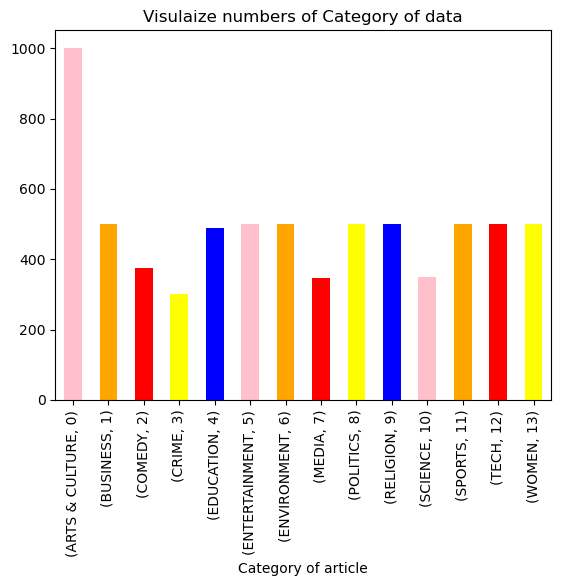

In [37]:
data.groupby('category').categoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of article")
plt.title("Visualize numbers of Category of data")
plt.show()

In [83]:
##visualising the text data
stop_words = set(stopwords.words('english'))

category_text_columns = {}
for id,category in categories.items():
    category_data_frame = data[data['categoryId'] == id]
    category_text_columns[category] = category_data_frame['body']

category_text_columns

{'ARTS & CULTURE': 0       In October 2017, Carolyn Kramer received a dis...
 1       This week I talked with actor Jeff Hiller abou...
 2       The New Yorker is taking on President Donald T...
 3       Kellen Hickey, a 26-year-old who lives in Huds...
 4       There’s something about combining the traditio...
                               ...                        
 997     \r\nFrom left to right, Kirsten Quinn (Lisa Mo...
 998     \r\nHelen Mirren in Peter Morgan's The Audienc...
 999     Today is an important day in the musical theat...
 1000    If Neil deGrasse Tyson's version of "Cosmos" h...
 1001    Recently, I visited New York to see an exhibit...
 Name: body, Length: 1001, dtype: object,
 'BUSINESS': 1002    WASHINGTON (Reuters) - The Donald Trump admini...
 1003    Starbucks announced a new policy of inclusivit...
 1004    SEATTLE (Reuters) - Seattle’s city council on ...
 1005    Uber will no longer force individual victims o...
 1006    Sophia started using Uber soon aft

In [84]:
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
    if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop_words,background_color = color,
    width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

arts & culture related words :


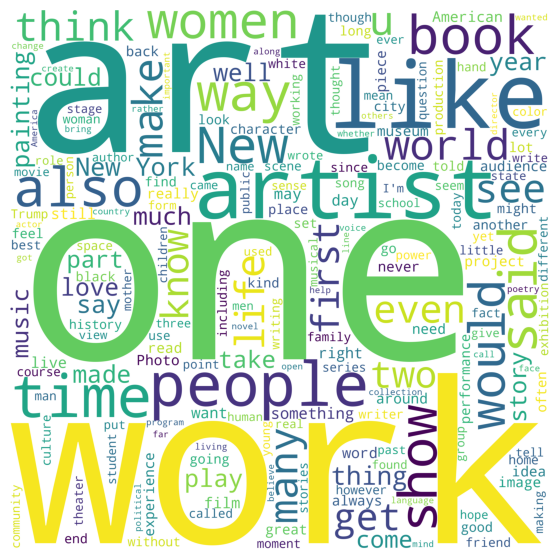



business related words :


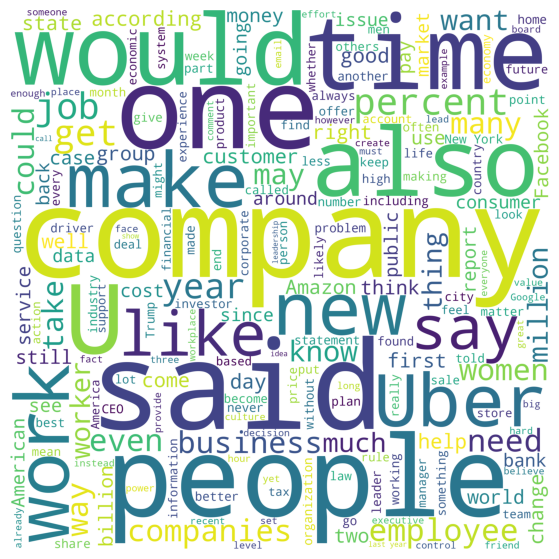



comedy related words :


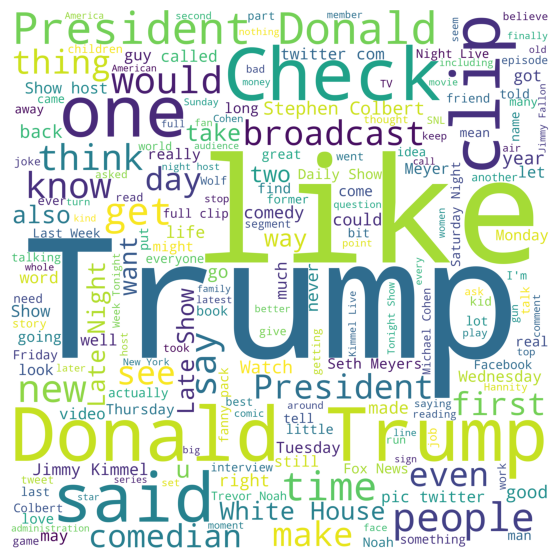



crime related words :


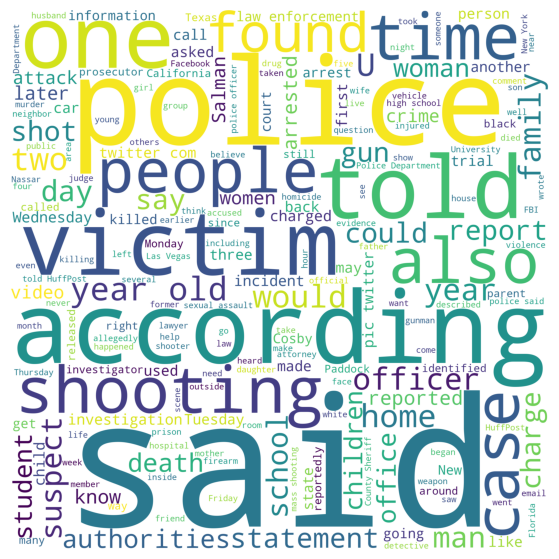



education related words :


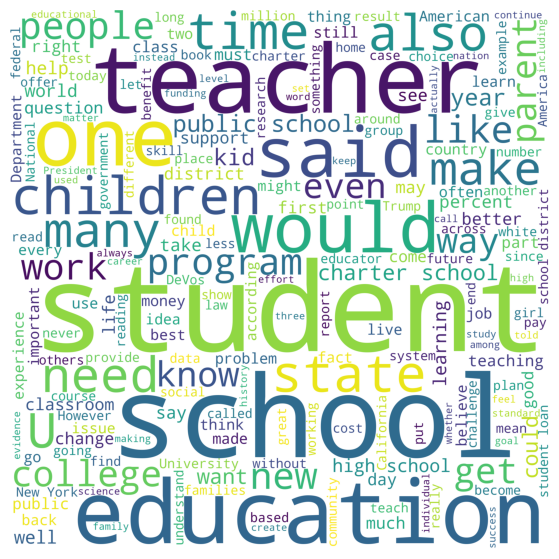



entertainment related words :


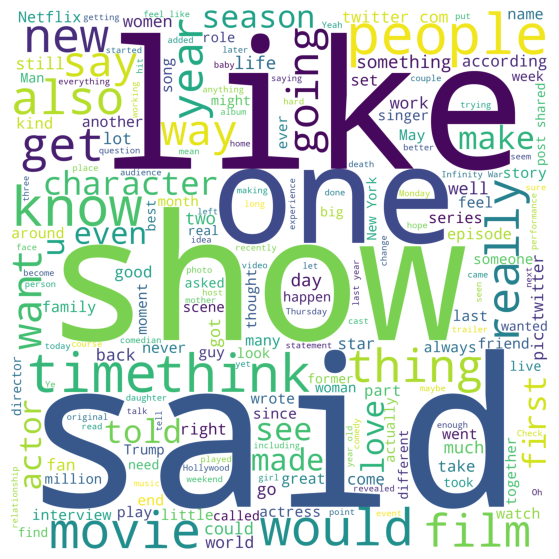



environment related words :


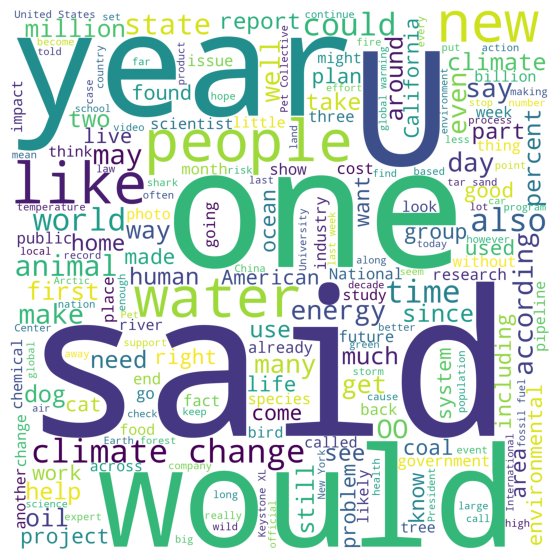



media related words :


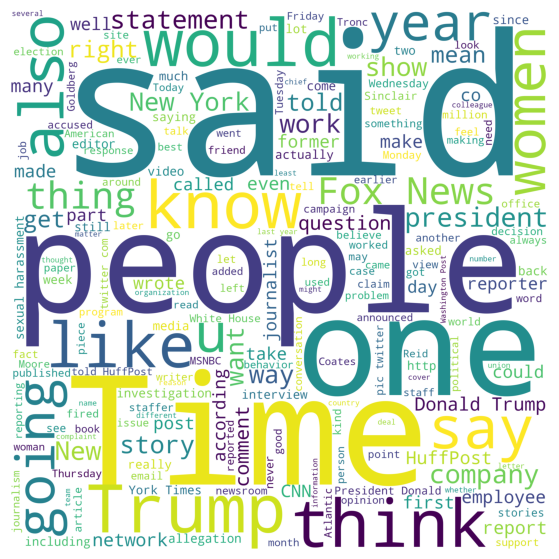



politics related words :


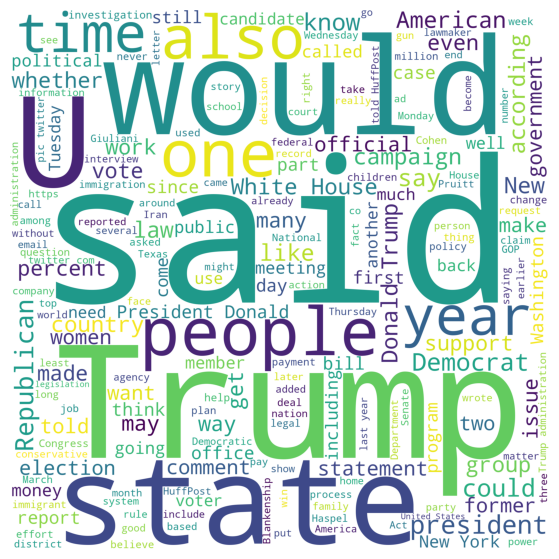



religion related words :


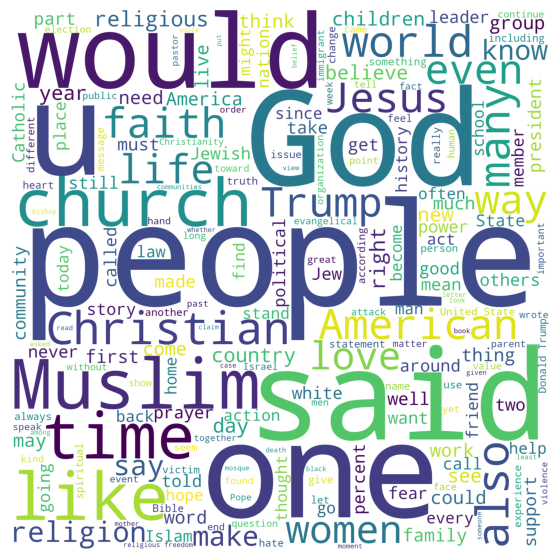



science related words :


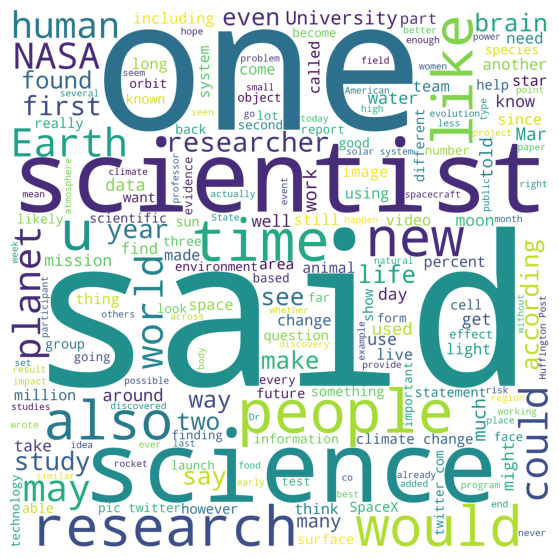



sports related words :


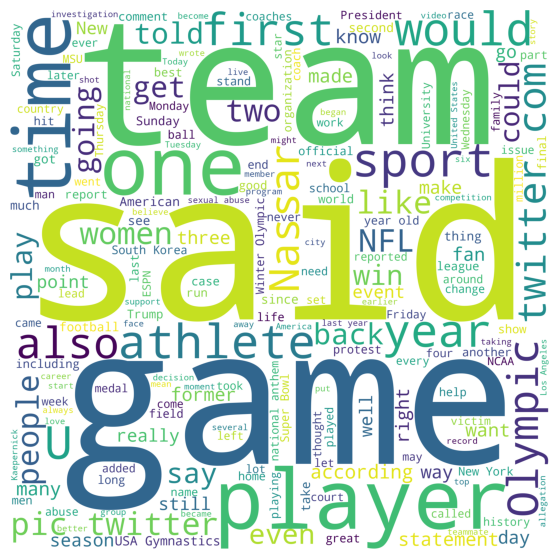



tech related words :


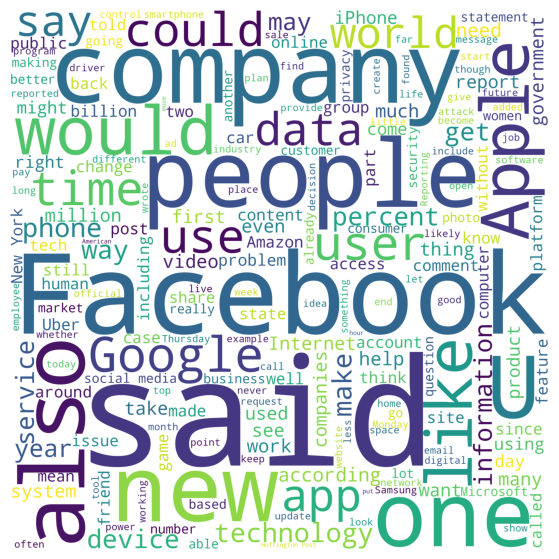



women related words :


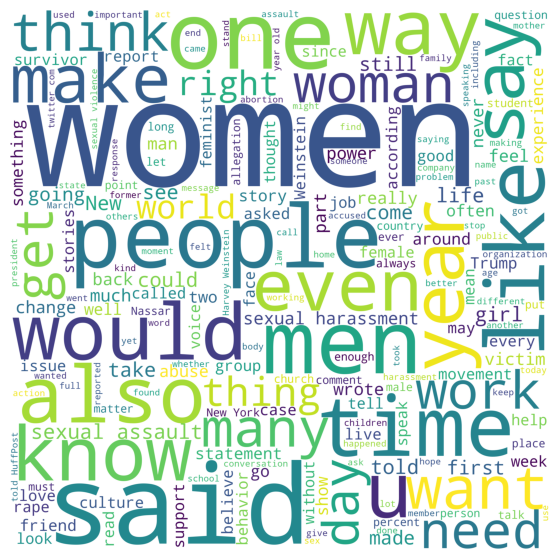

In [72]:
for category in category_text_columns:
    print(category.lower(),"related words :")
    wordcloud_draw(category_text_columns[category])
    print("=============================================================================")
    print('\n')

In [97]:
##preprocess text columns
text_data = data["body"]
text_data.head(10)

0    In October 2017, Carolyn Kramer received a dis...
1    This week I talked with actor Jeff Hiller abou...
2    The New Yorker is taking on President Donald T...
3    Kellen Hickey, a 26-year-old who lives in Huds...
4    There’s something about combining the traditio...
5    Joosje Duk has a sweater that reads “DON’T PAN...
6    Multiple women have accused Broadway star Ben ...
7    The world’s largest ice festival began this we...
8    Non-New Yorkers officially have less than two ...
9    David Bowie’s cultural legacy continues. The l...
Name: body, dtype: object

In [98]:
data['body']

0       In October 2017, Carolyn Kramer received a dis...
1       This week I talked with actor Jeff Hiller abou...
2       The New Yorker is taking on President Donald T...
3       Kellen Hickey, a 26-year-old who lives in Huds...
4       There’s something about combining the traditio...
                              ...                        
6872    I still think about that Tuesday night dinner ...
6873    I remember the morning of my high school gradu...
6874    My husband, Gene, doesn't wear pajamas. I aske...
6875    \nBy AntonioGuillem, via ThinkStock\nBy  Lisa ...
6876    My name is Jamie and I'm an online date-aholic...
Name: body, Length: 6872, dtype: object

In [141]:
def remove_tags(text):
    tag_regex = re.compile(r'<[^>]+>')
    return re.sub(tag_regex, '', text)


def remove_special_chars(text):
    text_without_special_chars = []
    for char in text:
        if char.isalnum():
            text_without_special_chars.append(char)
        else:
            text_without_special_chars.append(' ')
    return "".join(text_without_special_chars)


def convert_lower(text):
    return text.lower()


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])


def lemmatize_words(text):
    wordnet = WordNetLemmatizer()
    words = word_tokenize(text) 
    return " ".join([wordnet.lemmatize(word) for word in words])

In [142]:
##apply text processing
data['body'] = data['body'].apply(remove_tags).apply(remove_special_chars).apply(convert_lower).apply(remove_stopwords).apply(lemmatize_words)

## MODEL CREATION

In [ ]:
x = data['body']
y = dataset['categoryId']